In [1]:
### Correlation

In [2]:
#Dependencies
#conda install reportlab
import pandas as pd
import numpy as np
import matplotlib
import os
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import itertools

In [3]:
#constants
markersize = 2

In [4]:
#report path
report_location = r"C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\report"

#code name samples path
code_name_path = r"C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\TRANSFLECTANCIA NOV 23\CODE NAME SAMPLES.txt"

#optical properties datapath
transflectance_data_path = r"C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\new_data\2023NOV_TRANSFLECTANCE\transflectance\average"
transmittance_data_path = r"C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\clean_data\transmittance"
absorptance_data_path = r"C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\clean_data\absorptance"
reflectance_data_path = r"C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\clean_data\reflectance"

#Solar spectral irradiance datapath
solar_irradiance_data_path = r"C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\reflectivity"


In [5]:
def list_files_in_folder(folder_path):
    files_only_in_folder = []
    
    # Get the list of all files in the folder and its subfolders
    all_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            all_files.append(os.path.join(root, file))
    
    # Get the list of files that are only in the top-level folder
    for file in all_files:
        if os.path.isfile(file) and os.path.dirname(file) == folder_path:
            files_only_in_folder.append(file)
    
    return files_only_in_folder

In [6]:
transflectance_file_list = list_files_in_folder(transflectance_data_path)
transmittance_file_list = list_files_in_folder(transmittance_data_path)
absorptance_file_list = list_files_in_folder(absorptance_data_path)
reflectance_file_list = list_files_in_folder(reflectance_data_path)
irradiance_file_list = [solar_irradiance_data_path]
for file in irradiance_file_list: 
    print(file)
print(len(transmittance_file_list))
print(len(absorptance_file_list))
print(len(irradiance_file_list))

C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\reflectivity
22
22
1


In [7]:
def read_dataframes(file_path_list, measurement_type1, measurement_type2=None): 
    dataframes = []
    
    for file_path in file_path_list:
        if measurement_type2 is None:
            # For a single measurement type
            df = pd.read_csv(file_path, sep='\t', header=0, names=['wavelength', measurement_type1]).dropna()
            
            # Replace commas with dots
            df = df.replace(',','.', regex=True)
            
            # Add columns and convert types
            df["file"] = file_path
            df["sample"] = os.path.basename(file_path).replace("-RX", "").replace(".txt", "").replace("_AVERAGE", "").replace("-AX", "").replace("-TX", "")
            df["measurement_type"] = measurement_type1
            df['wavelength'] = df['wavelength'].astype(float)
            df[measurement_type1] = df[measurement_type1].astype(float)
        else:
            # For two measurement types
            df = pd.read_csv(file_path, sep='\t', header=0, names=['wavelength', measurement_type1, measurement_type2]).dropna()
            
            # Replace commas with dots
            df = df.replace(',','.', regex=True)
            
            # Add columns and convert types
            df["file"] = file_path
            df["sample"] = os.path.basename(file_path)
            df["measurement_type"] = f"{measurement_type1}_{measurement_type2}"
            df['wavelength'] = df['wavelength'].astype(float)
            df[measurement_type1] = df[measurement_type1].astype(float)
            df[measurement_type2] = df[measurement_type2].astype(float)
        
        # Append the dataframe to the list
        dataframes.append(df)
        
    return dataframes


## Dataframes 

In [8]:
reflectance_dfs = read_dataframes(reflectance_file_list, "reflectance")
transmittance_dfs = read_dataframes(transmittance_file_list, "transmittance")
absorptance_dfs = read_dataframes(absorptance_file_list, "absorptance")
#irradiance_dfs = read_dataframes(irradiance_file_list, "tilt_irradiance", "normal_irradiance")
all_dfs = [reflectance_dfs,transmittance_dfs,absorptance_dfs]

for df_list in all_dfs:
    for df in df_list:
        df

In [9]:
def plot_dataframes2(df_of_dfs, column_to_plot='col1', x_column='wavelength'):
    """
    Plot data from multiple DataFrames contained within a DataFrame.

    Parameters:
        df_of_dfs (pandas.DataFrame): DataFrame containing multiple DataFrames.
        column_to_plot (str): Name of the column to plot from each DataFrame.
        x_column (str): Name of the x-axis column.

    Returns:
        None (Displays the plot).
    """
    plt.figure(figsize=(10, 6))

    for row in df_of_dfs:
        # Extract the current DataFrame and plot desired columns against the x_column
        #print(row)
        plt.plot(row[x_column], row[column_to_plot], label=row['sample'][2])
        

  
    # Set the legend's font size
    #plt.legend(prop={'size': 8})  # Adjust the font size as needed

    plt.xlabel(x_column.capitalize())
    plt.ylabel(column_to_plot.capitalize() + r' [%]')
    #plt.title(column_to_plot.capitalize() + " for all samples")
    plt.title("")

    # Show legend and plot
    plt.legend()
    plt.tight_layout()
    plt.show()


In [14]:
def plot_dataframes(df_of_dfs, column_to_plot='col1', x_column='wavelength', font_size=8):
    """
    Plot data from multiple DataFrames contained within a DataFrame.

    Parameters:
        df_of_dfs (pandas.DataFrame): DataFrame containing multiple DataFrames.
        column_to_plot (str): Name of the column to plot from each DataFrame.
        x_column (str): Name of the x-axis column.
        font_size (int): Font size for labels and legend (default is 12).

    Returns:
        None (Displays the plot).
    """
    plt.figure(figsize=(10, 6))

    for row in df_of_dfs:
        # Extract the current DataFrame and plot desired columns against the x_column
        plt.plot(row[x_column], row[column_to_plot], label=row['sample'][3])

    # Set the font size for labels, legend, and title
    plt.xlabel(x_column.capitalize() + " [nm]", fontsize=10)
    plt.ylabel(column_to_plot.capitalize() + r' [%]', fontsize=10)
    plt.grid(True)
    plt.title("")

    # Show legend with adjusted font size
    plt.legend(fontsize=font_size)

    plt.tight_layout()
    plt.show()

      wavelength  reflectance  \
0          256.0     6.177852   
1          257.0     6.152497   
2          258.0     6.129322   
3          259.0     6.095693   
4          260.0     6.062574   
...          ...          ...   
1740      1996.0    21.408971   
1741      1997.0    21.434705   
1742      1998.0    21.724003   
1743      1999.0    21.675873   
1744      2000.0    21.828189   

                                                   file       sample  \
0     C:\Users\EstebanSoto\Documents\Estudio Optico ...  C.CHRY.MV73   
1     C:\Users\EstebanSoto\Documents\Estudio Optico ...  C.CHRY.MV73   
2     C:\Users\EstebanSoto\Documents\Estudio Optico ...  C.CHRY.MV73   
3     C:\Users\EstebanSoto\Documents\Estudio Optico ...  C.CHRY.MV73   
4     C:\Users\EstebanSoto\Documents\Estudio Optico ...  C.CHRY.MV73   
...                                                 ...          ...   
1740  C:\Users\EstebanSoto\Documents\Estudio Optico ...  C.CHRY.MV73   
1741  C:\Users\EstebanSoto\

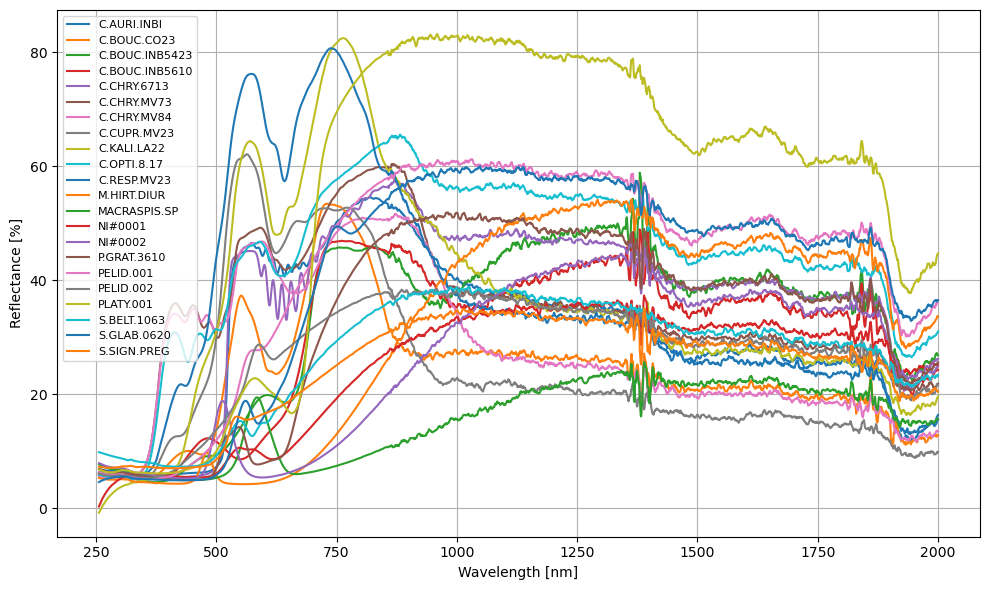

In [15]:
print(reflectance_dfs[5])
plot_dataframes(reflectance_dfs, column_to_plot='reflectance', x_column='wavelength')

      wavelength  transmittance  \
3          255.0       6.242102   
4          256.0       6.218145   
5          257.0       6.200173   
6          258.0       6.170842   
7          259.0       6.141817   
...          ...            ...   
1744      1996.0      70.384197   
1745      1997.0      70.578498   
1746      1998.0      70.936745   
1747      1999.0      71.135491   
1748      2000.0      71.297660   

                                                   file       sample  \
3     C:\Users\EstebanSoto\Documents\Estudio Optico ...  C.AURI.INBI   
4     C:\Users\EstebanSoto\Documents\Estudio Optico ...  C.AURI.INBI   
5     C:\Users\EstebanSoto\Documents\Estudio Optico ...  C.AURI.INBI   
6     C:\Users\EstebanSoto\Documents\Estudio Optico ...  C.AURI.INBI   
7     C:\Users\EstebanSoto\Documents\Estudio Optico ...  C.AURI.INBI   
...                                                 ...          ...   
1744  C:\Users\EstebanSoto\Documents\Estudio Optico ...  C.AURI.INBI   
174

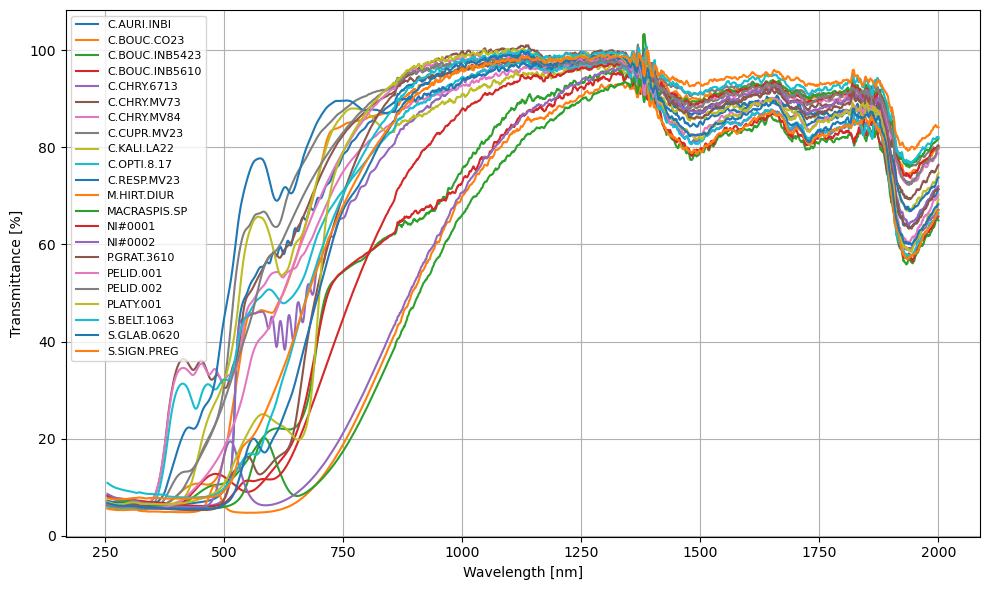

In [16]:
print(transmittance_dfs[0])
plot_dataframes(transmittance_dfs, column_to_plot='transmittance', x_column='wavelength')

      wavelength  absorptance  \
3          255.0    93.757898   
4          256.0    93.781855   
5          257.0    93.799827   
6          258.0    93.829158   
7          259.0    93.858183   
...          ...          ...   
1744      1996.0    29.615803   
1745      1997.0    29.421502   
1746      1998.0    29.063255   
1747      1999.0    28.864509   
1748      2000.0    28.702340   

                                                   file       sample  \
3     C:\Users\EstebanSoto\Documents\Estudio Optico ...  C.AURI.INBI   
4     C:\Users\EstebanSoto\Documents\Estudio Optico ...  C.AURI.INBI   
5     C:\Users\EstebanSoto\Documents\Estudio Optico ...  C.AURI.INBI   
6     C:\Users\EstebanSoto\Documents\Estudio Optico ...  C.AURI.INBI   
7     C:\Users\EstebanSoto\Documents\Estudio Optico ...  C.AURI.INBI   
...                                                 ...          ...   
1744  C:\Users\EstebanSoto\Documents\Estudio Optico ...  C.AURI.INBI   
1745  C:\Users\EstebanSoto\

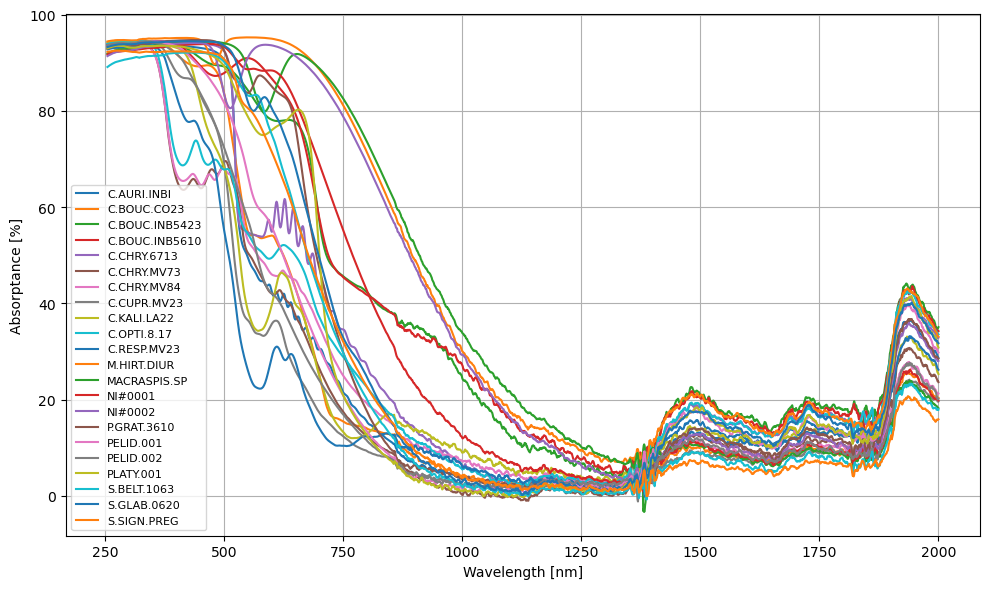

In [17]:
print(absorptance_dfs[0])
plot_dataframes(absorptance_dfs, column_to_plot='absorptance', x_column='wavelength')